<a href="https://colab.research.google.com/github/shilpapanniru/ShilpaReddyDS/blob/main/13th_Dec_census_income_with_boosting_techniques.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Census Income Project**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/census_income.csv')

In [ ]:
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,annual_income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  annual_income   32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [ ]:
#checking the null values
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
annual_income     0
dtype: int64

In [ ]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'annual_income'],
      dtype='object')

In [ ]:
for col in df.columns:
  print(col)
  print(df[col].unique())

age
[39 50 38 53 28 37 49 52 31 42 30 23 32 40 34 25 43 54 35 59 56 19 20 45
 22 48 21 24 57 44 41 29 18 47 46 36 79 27 67 33 76 17 55 61 70 64 71 68
 66 51 58 26 60 90 75 65 77 62 63 80 72 74 69 73 81 78 88 82 83 84 85 86
 87]
workclass
['State-gov' 'Self-emp-not-inc' 'Private' 'Federal-gov' 'Local-gov' '?'
 'Self-emp-inc' 'Without-pay' 'Never-worked']
fnlwgt
[ 77516  83311 215646 ...  34066  84661 257302]
education
['Bachelors' 'HS-grad' '11th' 'Masters' '9th' 'Some-college' 'Assoc-acdm'
 'Assoc-voc' '7th-8th' 'Doctorate' 'Prof-school' '5th-6th' '10th'
 '1st-4th' 'Preschool' '12th']
education-num
[13  9  7 14  5 10 12 11  4 16 15  3  6  2  1  8]
marital-status
['Never-married' 'Married-civ-spouse' 'Divorced' 'Married-spouse-absent'
 'Separated' 'Married-AF-spouse' 'Widowed']
occupation
['Adm-clerical' 'Exec-managerial' 'Handlers-cleaners' 'Prof-specialty'
 'Other-service' 'Sales' 'Craft-repair' 'Transport-moving'
 'Farming-fishing' 'Machine-op-inspct' 'Tech-support' '?'
 'Protective-

In [ ]:
df.replace('?', np.nan, inplace=True)

In [ ]:
for col in df.columns:
  print(col)
  print(df[col].unique())

age
[39 50 38 53 28 37 49 52 31 42 30 23 32 40 34 25 43 54 35 59 56 19 20 45
 22 48 21 24 57 44 41 29 18 47 46 36 79 27 67 33 76 17 55 61 70 64 71 68
 66 51 58 26 60 90 75 65 77 62 63 80 72 74 69 73 81 78 88 82 83 84 85 86
 87]
workclass
['State-gov' 'Self-emp-not-inc' 'Private' 'Federal-gov' 'Local-gov' nan
 'Self-emp-inc' 'Without-pay' 'Never-worked']
fnlwgt
[ 77516  83311 215646 ...  34066  84661 257302]
education
['Bachelors' 'HS-grad' '11th' 'Masters' '9th' 'Some-college' 'Assoc-acdm'
 'Assoc-voc' '7th-8th' 'Doctorate' 'Prof-school' '5th-6th' '10th'
 '1st-4th' 'Preschool' '12th']
education-num
[13  9  7 14  5 10 12 11  4 16 15  3  6  2  1  8]
marital-status
['Never-married' 'Married-civ-spouse' 'Divorced' 'Married-spouse-absent'
 'Separated' 'Married-AF-spouse' 'Widowed']
occupation
['Adm-clerical' 'Exec-managerial' 'Handlers-cleaners' 'Prof-specialty'
 'Other-service' 'Sales' 'Craft-repair' 'Transport-moving'
 'Farming-fishing' 'Machine-op-inspct' 'Tech-support' nan
 'Protective-

In [ ]:
df.isnull().sum()
#checking the null values


age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
annual_income        0
dtype: int64

In [ ]:
df.isnull().sum().sum()

4262

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
annual_income     0
dtype: int64

In [ ]:
#checking the duplicate values

df.duplicated().sum()

23

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.duplicated().sum()


0

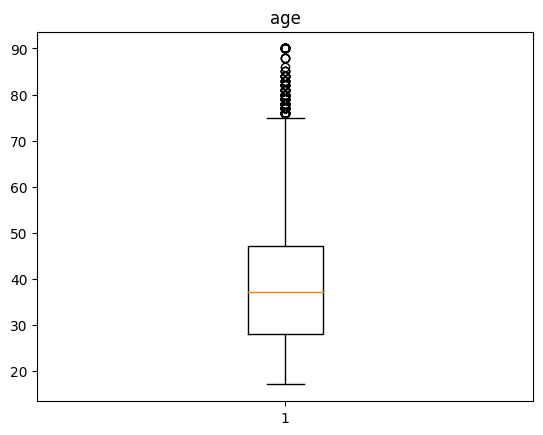

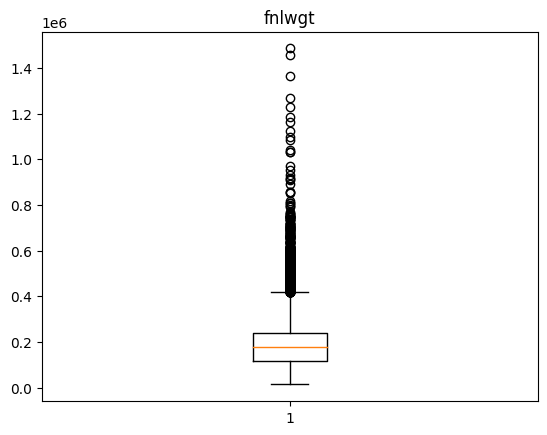

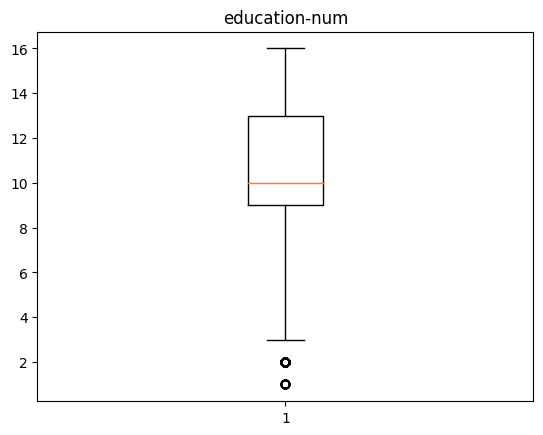

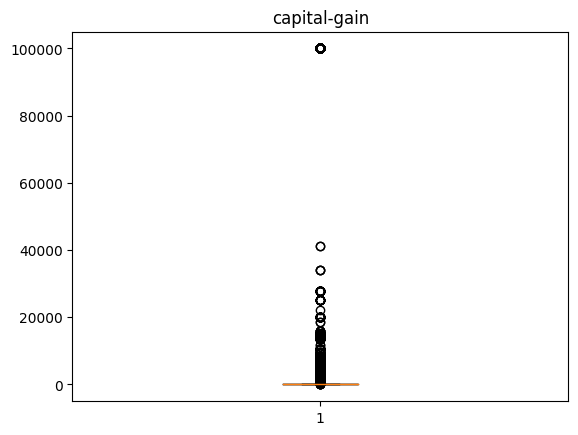

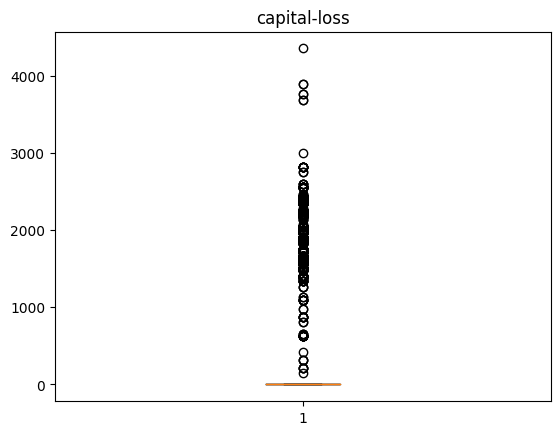

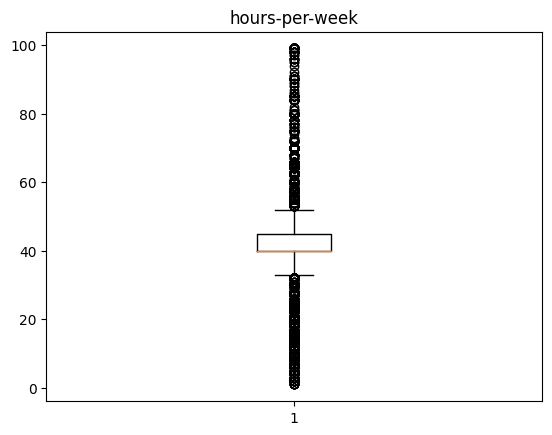

In [ ]:
#outlier detection
for col in df.columns:
  if df[col].dtype != 'object':
    plt.boxplot(df[col])
    plt.title(col)
    plt.show()

In [ ]:
out_cols=['age','fnlwgt','education-num','hours-per-week']

In [ ]:
df["capital-loss"].value_counts()

capital-loss
0       28712
1902      194
1977      162
1887      155
1848       50
        ...  
2080        1
4356        1
1539        1
1844        1
1411        1
Name: count, Length: 90, dtype: int64

In [ ]:
df["capital-gain"].value_counts()


capital-gain
0        27601
15024      337
7688       270
7298       240
99999      148
         ...  
1639         1
6097         1
2538         1
1455         1
1086         1
Name: count, Length: 118, dtype: int64

In [ ]:
out_cols

['age', 'fnlwgt', 'education-num', 'hours-per-week']

In [ ]:
for col in out_cols:
  q1 = df[col].quantile(0.25)
  q3 = df[col].quantile(0.75)
  iqr = q3 - q1
  upper_limit = q3 + 1.5 * iqr
  lower_limit = q1 - 1.5 * iqr
  df=df[(df[col] <= upper_limit) & (df[col] >= lower_limit)]

In [ ]:
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,annual_income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
le=LabelEncoder()

In [ ]:
for col in df.columns:
  if df[col].dtype == 'object':
    df[col]=le.fit_transform(df[col])

In [ ]:
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,annual_income
0,39,5,77516,8,13,4,0,1,4,1,2174,0,40,38,0
2,38,2,215646,10,9,0,5,1,4,1,0,0,40,38,0
3,53,2,234721,1,7,2,5,0,2,1,0,0,40,38,0
4,28,2,338409,8,13,2,9,5,2,0,0,0,40,4,0
5,37,2,284582,11,14,2,3,5,4,0,0,0,40,38,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,22,2,310152,13,10,4,10,1,4,1,0,0,40,38,0
32556,27,2,257302,6,12,2,12,5,4,0,0,0,38,38,0
32557,40,2,154374,10,9,2,6,0,4,1,0,0,40,38,1
32558,58,2,151910,10,9,6,0,4,4,0,0,0,40,38,0


In [ ]:
df["annual_income"].value_counts()

annual_income
0    15709
1     5608
Name: count, dtype: int64

#Model Building

In [ ]:
x=df.drop('annual_income',axis=1)
y=df['annual_income']

In [ ]:
x

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,39,5,77516,8,13,4,0,1,4,1,2174,0,40,38
2,38,2,215646,10,9,0,5,1,4,1,0,0,40,38
3,53,2,234721,1,7,2,5,0,2,1,0,0,40,38
4,28,2,338409,8,13,2,9,5,2,0,0,0,40,4
5,37,2,284582,11,14,2,3,5,4,0,0,0,40,38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,22,2,310152,13,10,4,10,1,4,1,0,0,40,38
32556,27,2,257302,6,12,2,12,5,4,0,0,0,38,38
32557,40,2,154374,10,9,2,6,0,4,1,0,0,40,38
32558,58,2,151910,10,9,6,0,4,4,0,0,0,40,38


In [ ]:
y

0        0
2        0
3        0
4        0
5        0
        ..
32555    0
32556    0
32557    1
32558    0
32560    1
Name: annual_income, Length: 21317, dtype: int64

**Splitting data into training and testing**

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)


In [ ]:
x_train

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
11468,56,1,238582,13,10,2,2,0,4,1,0,0,41,38
26298,24,1,103277,8,13,4,9,3,4,0,0,0,50,38
27293,26,4,31143,10,9,2,3,0,4,1,0,0,45,38
1221,48,2,349151,10,9,2,2,0,4,1,0,0,40,38
5101,47,5,80914,11,14,2,3,0,4,1,0,0,47,38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17183,51,1,156003,10,9,0,10,1,4,1,0,0,40,38
18187,46,2,292504,13,10,3,11,4,4,0,0,0,40,38
8300,25,2,134821,10,9,4,0,3,4,0,0,0,40,38
1332,23,2,275244,10,9,4,6,1,2,1,0,0,35,38


In [ ]:
y_train

11468    1
26298    0
27293    0
1221     0
5101     1
        ..
17183    0
18187    0
8300     0
1332     0
24082    0
Name: annual_income, Length: 14921, dtype: int64

In [ ]:
x_test

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
16612,24,2,194630,8,13,4,12,1,4,1,0,0,35,38
22475,41,3,149102,8,13,2,3,0,4,1,0,0,35,38
15170,25,2,234190,13,10,4,11,1,4,1,0,0,35,38
10487,27,2,285897,10,9,2,9,0,4,1,0,1848,45,38
16904,48,2,139290,0,6,5,6,3,4,0,0,0,48,38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1052,30,2,296453,8,13,2,0,0,4,1,7298,0,40,38
24904,21,2,184543,10,9,4,11,1,4,0,0,0,40,38
7857,30,1,370990,11,14,4,9,1,4,0,0,0,40,38
26263,38,2,32897,1,7,0,11,4,4,0,0,0,40,38


In [ ]:
y_test

16612    0
22475    1
15170    0
10487    1
16904    0
        ..
1052     1
24904    0
7857     0
26263    0
32292    1
Name: annual_income, Length: 6396, dtype: int64

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
log_model=LogisticRegression()

In [ ]:
# training the model
log_model.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
#testing of model
y_pred=log_model.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
y_test

16612    0
22475    1
15170    0
10487    1
16904    0
        ..
1052     1
24904    0
7857     0
26263    0
32292    1
Name: annual_income, Length: 6396, dtype: int64

In [ ]:
from sklearn.metrics import *

In [ ]:
log_acc=accuracy_score(y_test,y_pred)
log_acc

0.7700125078173858

In [ ]:
confusion_matrix(y_test,y_pred)

array([[4511,  206],
       [1265,  414]])

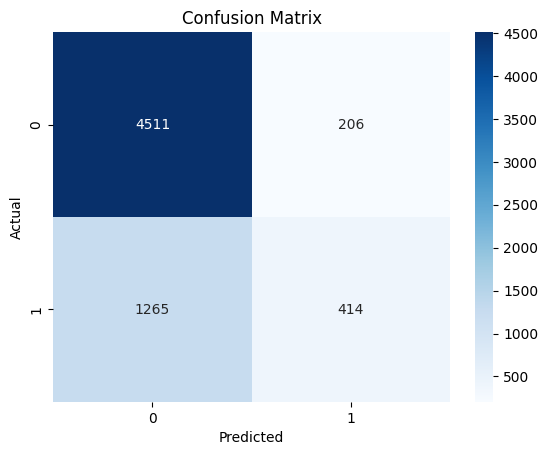

In [ ]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,cmap='Blues',fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dt_model=DecisionTreeClassifier(random_state=43)

In [ ]:
dt_model.fit(x_train,y_train)

DecisionTreeClassifier(random_state=43)

In [ ]:
y_pred=dt_model.predict(x_test)
y_pred

array([0, 0, 0, ..., 1, 0, 0])

In [ ]:
dt_acc=accuracy_score(y_test,y_pred)
dt_acc

0.7923702313946216

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf_model=RandomForestClassifier(oob_score=True)

In [ ]:
rf_model.fit(x_train,y_train)

RandomForestClassifier(oob_score=True)

In [ ]:
y_pred=rf_model.predict(x_test)
y_pred

array([0, 1, 0, ..., 0, 0, 0])

In [ ]:
rf_acc=accuracy_score(y_test,y_pred)
rf_acc

0.8353658536585366

In [ ]:
rf_model.oob_score_

0.8379465183298707

#**Implementation of Adaboost**

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
ada_model=AdaBoostClassifier(n_estimators=100,learning_rate=1,random_state=42)

In [ ]:
ada_model.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier(learning_rate=1, n_estimators=100, random_state=42)

In [ ]:
pred=ada_model.predict(x_test)

In [ ]:
ada_acc=accuracy_score(y_test,pred)
ada_acc

0.8516260162601627

# **Implementation of Gradient boosting**

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
gb_model=GradientBoostingClassifier(n_estimators=100,learning_rate=0.1,random_state=42)

In [ ]:
gb_model.fit(x_train,y_train)

GradientBoostingClassifier(random_state=42)

In [ ]:
y_pred=gb_model.predict(x_test)

In [ ]:
gb_acc=accuracy_score(y_test,y_pred)
gb_acc

0.8577235772357723

In [ ]:
!pip install pycaret

In [ ]:
from pycaret.classification import *

In [ ]:
clf=setup(data=df,target='annual_income')

,Description,Value
0,Session id,2599
1,Target,annual_income
2,Target type,Binary
3,Original data shape,"(21317, 15)"
4,Transformed data shape,"(21317, 15)"
5,Transformed train set shape,"(14921, 15)"
6,Transformed test set shape,"(6396, 15)"
7,Numeric features,14
8,Preprocess,True
9,Imputation type,simple


In [ ]:
clf.compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.8579,0.9145,0.6507,0.7733,0.7065,0.6138,0.6178,1.1420
gbc,Gradient Boosting Classifier,0.8559,0.9119,0.6105,0.7945,0.6901,0.5984,0.6074,1.6940
xgboost,Extreme Gradient Boosting,0.8527,0.9097,0.6545,0.7532,0.7002,0.6032,0.6060,0.2220
ada,Ada Boost Classifier,0.8488,0.9042,0.6077,0.7692,0.6787,0.5817,0.5887,0.7680
rf,Random Forest Classifier,0.8403,0.8922,0.6191,0.7327,0.6707,0.5663,0.5701,1.7200
et,Extra Trees Classifier,0.8286,0.8742,0.6128,0.6992,0.6527,0.5396,0.5420,1.5790
lda,Linear Discriminant Analysis,0.8014,0.8295,0.4283,0.7006,0.5314,0.4146,0.4350,0.0620
ridge,Ridge Classifier,0.7975,0.8295,0.3705,0.7246,0.4898,0.3798,0.4132,0.0970
lr,Logistic Regression,0.7965,0.8053,0.4109,0.6903,0.5147,0.3964,0.4180,3.4220
dt,Decision Tree Classifier,0.7957,0.7413,0.6265,0.6084,0.6169,0.4777,0.4781,0.3540


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=2599, reg_alpha=0.0, reg_lambda=0.0, subsample=1.0,
               subsample_for_bin=200000, subsample_freq=0)